# Final Project
## Data Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
figsize = (16,8)

### Rubric: Proper tagging of Github repository for final report as per deadlines (0.5 = 0.25 + 0.25 points)


gitHub repository: michellemarshgarcia/DataToolsFinal

### Rubric: Dataset and motivation slide (1 points)
How/why the dataset was collected and a description of the metadata of your dataset.

This data set includes information on all stops made by the Colorado State police. It comes from Stanford University's open policing project. The data is available at https://openpolicing.stanford.edu/data/. I wanted to use data from the City and County of Denver but they do not keep data on the race or gender of those being stopped which is the basis of my analysis. 

In the United States there are more than 50,000 traffic stops on a typical day. The potential number of data points for each stop is huge, from the demographics (age, race, gender) of the driver, to the location, time of day, stop reason, stop outcome, car model, and much more. Unfortunately, not every state makes this data available, and those that do often have different standards for which information is reported. Different counties and districts within each state can also be inconstant in how each traffic stop is recorded. The research team at Stanford has managed to gather traffic-stop data from twenty states, and has worked to regularize the reporting standards for 11 fields. In Colorado the police stop data sets that have at least 8 of the 11 variables are only available from the Colorado State Police and the City of Aurora.


In [3]:
df_co = pd.read_csv('co_statewide_2020_04_01.csv', low_memory=False)

### Rubric:Actual task definition/research question (2 points)
What real-world problem are you trying to solve? What are the input and output of your analysis?

Over the last year there has been increasing attention paid to the long-standing disparitites in outcomes between police and different demographic communities. This analysis will look at citations_per_warning, the ratio of citations to warnings. A higher number signifies a greater likelihood of being ticketed instead of getting off with a warning. We will also look at 
arrest_rate - The percentage of stops that end in an arrest. these will be the outputs, the input will be the relevant categories of data collected at traffic stops by the Colorado State Patrol.

We are exploring and analyzing the data to observe trends not determine fault or make inferences about why these disparities exsist. This project does not attempt to remedy any observed differences or make recommendations for action. There are stark differences in the number of of Coloradans who identify as women and men in terms of rates of initial stop and arrest rates. There are many ways to interpret these disparities but we will not make any attempt here. 

### Rubric: Literature review (2 points)
What other work has been done in this area, and how is your work novel compared to others?

Currently, a comprehensive, national repository detailing interactions between police and the public doesn’t exist. The Stanford Open Policing Project, is an interdisciplinary team of researchers and journalists at Stanford University that collects and standardizes data on vehicle and pedestrian stops from law enforcement departments across the country — all information is freely available, public, and sourced from relevant government entities. They have already gathered over 200 million records from dozens of state and local police departments across the country.

The Center for Policing Equity measures bias in policing. One in five Americans interacts with law enforcement yearly. Of those encounters, one million result in use of force. And if you’re Black, you are two to four times more likely to have force used than if you are White. They work directly with police to measure behaviors and revise policies results in fewer people killed and fewer people in jail.

RTI International's Center for Policing Research and Investigative Sciences hosted their sixth policing symposium virtually on February 11, 2021, and this year's theme is Data Driven Reform in Policing. The intended audience included law enforcement, first responders, policy makers, other criminal justice and public health professionals, and researchers. The symposium focused on how law enforcement agencies can leverage data to inform various reform efforts within their organization including alternative models for crisis response, use of force, community engagement, and hiring and recruitment practices.

My work is novel in that it looks at the Colorado context of a national debate.

# Data Exploration

This provides a quick look at the data so we can familiarize ourself with the look of the data and ensure that we've loaded it correctly.

In [4]:
df_co.head()

,raw_row_number,date,time,location,county_name,subject_age,subject_race,subject_sex,officer_id_hash,officer_sex,type,violation,arrest_made,citation_issued,warning_issued,outcome,contraband_found,search_conducted,search_basis,raw_Ethnicity
0,1947986|1947987,2013-06-19,NaN,"19, I70, 8",Mesa County,26.0,hispanic,male,b942632983,male,vehicular,Driver's Vision Obstructed Through Required Gl...,False,True,False,citation,NaN,False,NaN,H
1,1537576,2012-08-24,NaN,"254, H285, 11",Jefferson County,NaN,NaN,NaN,f3d4f46927,NaN,vehicular,NaN,False,False,False,NaN,NaN,False,NaN,NaN
2,1581594,2012-09-23,NaN,"115, I76, 13",Logan County,52.0,white,male,6e49e2fbc8,male,vehicular,Speeding (10-19 MPH Over the Maximum 75 MPH Li...,False,False,True,warning,NaN,False,NaN,W
3,1009205,2011-08-25,NaN,"197, H85, 47",Douglas County,32.0,white,female,eaea851669,NaN,vehicular,Speeding (10-19 MPH Over Prima Facie Limit *),False,True,False,citation,NaN,False,NaN,W
4,1932619,2013-06-08,NaN,"107, H287, 45",Kiowa County,33.0,hispanic,male,d18e34d749,male,vehicular,Failed to Drive in Single Lane (Weaving),False,False,True,warning,NaN,False,NaN,H


Here we take a look at all of the column labels in the data set.

In [5]:
df_co.columns

Index(['raw_row_number', 'date', 'time', 'location', 'county_name',
       'subject_age', 'subject_race', 'subject_sex', 'officer_id_hash',
       'officer_sex', 'type', 'violation', 'arrest_made', 'citation_issued',
       'warning_issued', 'outcome', 'contraband_found', 'search_conducted',
       'search_basis', 'raw_Ethnicity'],
      dtype='object')

Now we will count the values in each of the columns before exploring the data further. 

In [6]:
df_co.count()

raw_row_number      3112853
date                3112850
time                      0
location            3112822
county_name         3112822
subject_age         2254600
subject_race        2711213
subject_sex         2216327
officer_id_hash     2584742
officer_sex          989962
type                3112853
violation           2612701
arrest_made         1684665
citation_issued     1684665
warning_issued      1684665
outcome             1296459
contraband_found       9956
search_conducted    2881770
search_basis           9759
raw_Ethnicity       2733417
dtype: int64

### Rubric: We can see that we can clean up the data by dropping the time column. 

 Quality of cleaning (6 points, 2 points each) - Data cleaning and type conversion activity. Please share anything unusual you faced during this activity.
 - What did you do about missing values and why? Handling missing values properly is very important.
 - New feature/attribute creation and data summary statistics and interpretation.

We can see that we can clean up the data by dropping the time column after applying the count function to the initial dataFrame. It was best to remove time because there were no values associated with it. By exploring the data and summary stats we can see what information is not relevant to our analysis. I used del to remove the entire column labled time and produced a new version of the DataFrame.  

In [7]:
del df_co["time"]
df_co.count()

raw_row_number      3112853
date                3112850
location            3112822
county_name         3112822
subject_age         2254600
subject_race        2711213
subject_sex         2216327
officer_id_hash     2584742
officer_sex          989962
type                3112853
violation           2612701
arrest_made         1684665
citation_issued     1684665
warning_issued      1684665
outcome             1296459
contraband_found       9956
search_conducted    2881770
search_basis           9759
raw_Ethnicity       2733417
dtype: int64

We look at the total numnber of stops by county. Note: Denver County is not included in the data set because they collect no identiying information about people who are stopped. El Paso County is home to Colorado's second largest metro area, Colorado Springs. The counties with the greatest number of stops are also the most populous. 

In [8]:
df_co['county_name'].value_counts()

El Paso County      245593
Jefferson County    240078
Adams County        194119
Weld County         156617
Larimer County      152938
                     ...  
Phillips County       2226
Custer County          902
San Juan County        371
Hinsdale County        193
Academy County           2
Name: county_name, Length: 65, dtype: int64

The we look at the data by type of presumed violation. Speeding is the primary violation type. This data is from the Colorado State Patrol who is primarily responible for law enforcement on interestates, highways, byways, and rural routes. 

In [9]:
df_co['violation'].value_counts()

Speeding (10-19 MPH Over Prima Facie Limit)                                                                                                                                                                                                         245546
Speeding (10-19 MPH Over Prima Facie Limit *)                                                                                                                                                                                                       230372
Speeding (5-9 MPH Over Prima Facie Limit *)                                                                                                                                                                                                         142935
Speeding (5-9 MPH Over Prima Facie Limit)                                                                                                                                                                                                           106

Here we look at the data by type of outcome of the police interaction with the community member. There are three possible outcomes, including warning, citation, or arrest. The data indicates that it is far more likely that people who are stopped are most likely to issued a warning.

In [10]:
df_co['outcome'].value_counts()

warning     798954
citation    491137
arrest        6368
Name: outcome, dtype: int64

The data on whether or not a search of the subject results from the police contact indicates that a stop resulting in a search is far more infrequent than a stop not resulting in a search of the subject. 

In [11]:
df_co['search_conducted'].value_counts()

False    2871814
True        9956
Name: search_conducted, dtype: int64

As we look by demographic categories we see that men are stopped at twice the rate of women.

In [12]:
df_co['subject_sex'].value_counts()

male      1527440
female     688887
Name: subject_sex, dtype: int64

White people are most likely to be stopped. According to the US Census Bureau the population of Colorado is 67.7% white non hispanic.

In [13]:
df_co['subject_race'].value_counts()

white                     2155261
hispanic                   383733
black                       88836
asian/pacific islander      44670
other                       21380
unknown                     17333
Name: subject_race, dtype: int64

# Analysis
In order to assist in this analysis, we'll define a helper function to aggregate a few important statistics from our dataset. that will allow us to see any demographic based disparities in the outcome of traffic stops. 

- citations_per_warning - The ratio of citations to warnings. A higher number signifies a greater likelihood of being ticketed instead of getting off with a warning.

- arrest_rate - The percentage of stops that end in an arrest.

In [14]:
def compute_outcome_stats(df):
    """Compute statistics regarding the relative quanties of arrests, warnings, and citations"""
    n_total = len(df)
    n_warnings = len(df[df['outcome'] == 'warning'])
    n_citations = len(df[df['outcome'] == 'citation'])
    n_arrests = len(df[df['outcome'] == 'arrest'])
    citations_per_warning = n_citations / n_warnings
    arrest_rate = n_arrests / n_total
    
    return(pd.Series(data = { 
        'n_total': n_total,
        'n_warnings': n_warnings,
        'n_citations': n_citations,
        'n_arrests': n_arrests,
        'citations_per_warning': citations_per_warning,
        'arrest_rate': arrest_rate
    }))

In [15]:
compute_outcome_stats(df_co)

n_total                  3.112853e+06
n_warnings               7.989540e+05
n_citations              4.911370e+05
n_arrests                6.368000e+03
citations_per_warning    6.147250e-01
arrest_rate              2.045712e-03
dtype: float64

In [16]:
df_co.groupby('subject_sex').apply(compute_outcome_stats)

,n_total,n_warnings,n_citations,n_arrests,citations_per_warning,arrest_rate
subject_sex,,,,,,
female,688887.0,256601.0,156573.0,1386.0,0.610181,0.002012
male,1527440.0,538666.0,334374.0,4819.0,0.620745,0.003155


We can see by the summary statistics that men are pulled over at twice the rate of women and arrested at four times the rate.

In [17]:
df_co.groupby('subject_race').apply(compute_outcome_stats)

,n_total,n_warnings,n_citations,n_arrests,citations_per_warning,arrest_rate
subject_race,,,,,,
asian/pacific islander,44670.0,11618.0,7842.0,69.0,0.674987,0.001545
black,88836.0,23838.0,16879.0,340.0,0.708071,0.003827
hispanic,383733.0,101988.0,72603.0,2373.0,0.711878,0.006184
other,21380.0,4816.0,2167.0,116.0,0.449958,0.005426
unknown,17333.0,8933.0,5354.0,56.0,0.599351,0.003231
white,2155261.0,644455.0,386252.0,3261.0,0.599347,0.001513


We can see by the outcome statistcis that Black and Hispanic Coloradans are arrested at twice and quadruple the rate of Asian/Pacific Isander and White Coloradans, respectively. The rate of citations per warning are also higher for Black and Hispanic Coloradans compared Asian/Pacific Islander and white Coloradans though not to the same degree of disparity found in the areest rate.

# Data Visualization

### Rubric: Visualization (8 points, 2 points each)
 - Data visualization activity (box plot, bar plot, violin plot, and pairplot to see relationships 
and distribution, etc.).
 - Describe anything you find in the data after visualization.
 - What data visualization helped you understand about data distribution.
 - What you did about possible outlier as per data distribution visualization. 

<AxesSubplot:title={'center':'Arrest Rate By Race'}, ylabel='subject_race'>

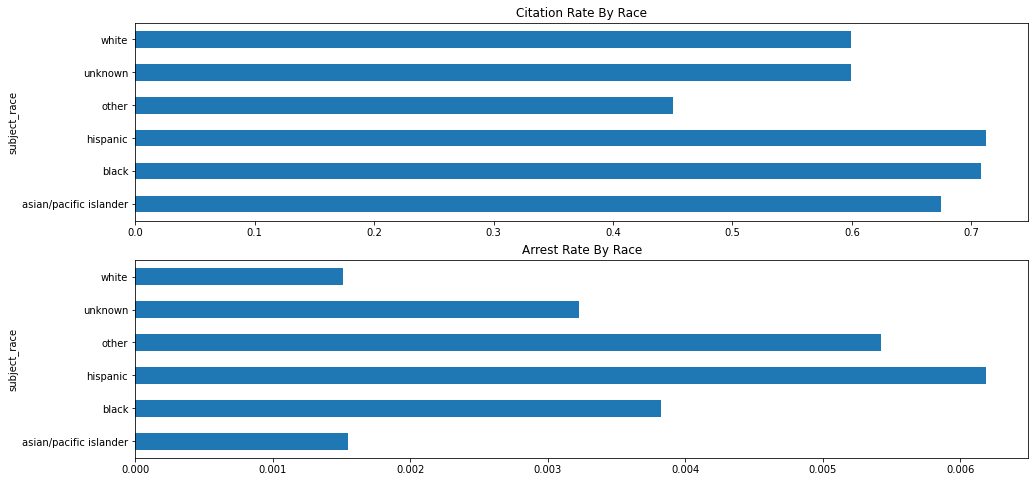

In [18]:
race_agg = df_co.groupby(['subject_race']).apply(compute_outcome_stats)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=figsize)
race_agg['citations_per_warning'].plot.barh(ax=axes[0], figsize=figsize, title="Citation Rate By Race")
race_agg['arrest_rate'].plot.barh(ax=axes[1], figsize=figsize, title='Arrest Rate By Race')

# fig.savefig('images/citations_and_arrests_by_race.png', bbox_inches='tight')

I used a horitzonal bar chart to visualize that data. Horizontal bar graphs represent the data horizontally. It is a graph whose bars are drawn horizontally. The data categories are shown on the vertical axis and the data values are shown on the horizontal axis. The degree of disparity among white and unidentified subjects and those that identify as Black and Hispanic are pronouced in this visualization. You can really see that Hispanic people being pulled over in Colorado are four times as likely to be arrested as a result of that law enforcement conact as compared to White person being pulled over.

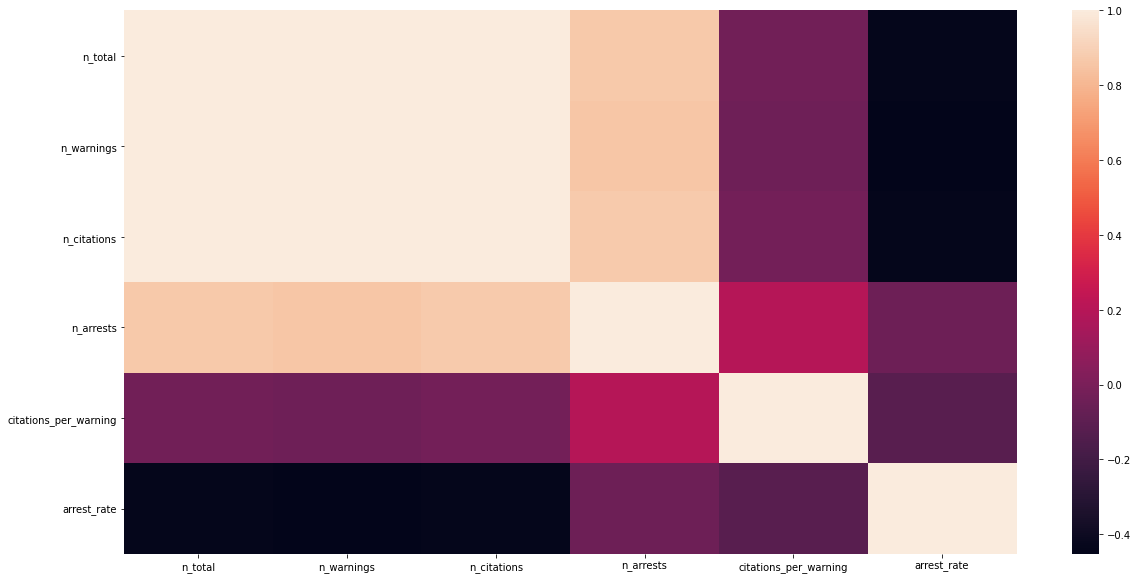

In [19]:
race_heatmap = df_co.groupby(['subject_race']).apply(compute_outcome_stats)
corr = race_heatmap.corr()
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr)
plt.show()

Citations_per_warning and arrest_rate positive correlate to subject_race for some racial categories a not others. Correlation measures linear relationships and is defined for numeric attributes. There need not be a linear relationship between variables(Arrested vs any other attributes). For categorical variable, we need to use a different measure of association.
Cramér's V, measure of association between two nominal variables. It is based on a nominal variation of Pearson’s Chi-Square Test.

I like the way the heatmap looks but it does not show with same clarity the magnitude of citation_per_warning and arrest_rate racial disparites as the horizontal bar chart does. Given the gravity of the problem clarity and transparency seem particulary important. Elevated arrest_rates and citation_per_warning rates mean increased costs, disrupted lives, time off work, and away from families. It can also mean a return to institutional settings for those previously involved with the judicial system or deportation to people pulled over while not in the country with legal status. 